## Importing Libraries

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from textblob import Word, TextBlob
from wordcloud import WordCloud
import string
from warnings import filterwarnings
filterwarnings('ignore')

In [66]:
df = pd.read_excel("/content/amazon.xlsx")
df

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...
...,...,...,...,...
5606,4,0,Recommend,Great product for reasonable money. Delivered...
5607,5,0,"Terrible , different colors. I returned",Color is way off and panels do not match
5608,5,0,Extremely pleasing,These are great for my studio as they compleme...
5609,5,0,Perfect,Brought out the beauty in kids room. They love...


## NLP

### Normalizing Case Folding

In [67]:
df["Review"]

0                                           Happy with it
1       Good quality material however the panels are m...
2       Product was fun for bedroom windows.<br />Imag...
3        Lo unico que me gustaria es que sean un poco ...
4       Great bang for the buck I can't believe the qu...
                              ...                        
5606    Great product for reasonable money.  Delivered...
5607             Color is way off and panels do not match
5608    These are great for my studio as they compleme...
5609    Brought out the beauty in kids room. They love...
5610    Very cute curtains in my sons room! Thick enou...
Name: Review, Length: 5611, dtype: object

In [68]:
df['Review'] = df['Review'].str.lower()
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

### Punctuations

In [69]:
df['Review'] = df['Review'].str.replace('[^\w\s]','',regex = True)
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

### Numbers

In [70]:
df['Review'] = df['Review'].str.replace(r'[^\w\s]','',regex = True)
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

### Stopwords

In [71]:
nltk.download("stopwords")

sw = stopwords.words("english")

df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in sw))
df['Review']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

### Rarewords

In [72]:
deleted = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
deleted

glosy                          1
tittle                         1
cos                            1
heatingcooling                 1
steal                          1
                              ..
sonâs                          1
thoughreplaces                 1
halfraised                     1
quasimediterraneanjungleour    1
studioliving                   1
Length: 1000, dtype: int64

In [73]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in deleted))
df['Review']

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

### Lemmatization

In [74]:
nltk.download("wordnet")

df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                   happy
1          good quality material however panel mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio complement entire theme area phot...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

## Text Visualization

In [75]:
# Term Frequency

tf = df['Review'].apply(lambda x: pd.value_counts(str(x).split())).sum(axis = 0).reset_index()
tf.columns = ['words','tf']
tf = tf.sort_values(by = 'tf', ascending=False)
tf

,words,tf
66,curtain,2588.0
42,look,1530.0
119,love,1453.0
104,room,1129.0
167,like,1053.0
...,...,...
3022,swear,1.0
3023,magnifying,1.0
3028,hellooo,1.0
3030,billiards,1.0


<Axes: ylabel='words'>

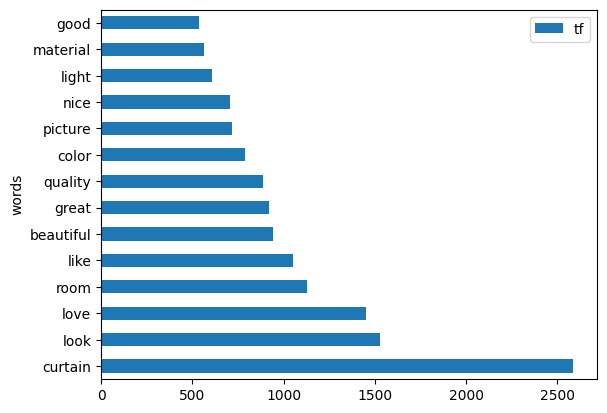

In [76]:
tf[tf["tf"] > 500].plot.barh(x = "words", y = "tf")

In [77]:
text = " ".join(df['Review'].str.split().map(" ".join))
text

'happy good quality material however panel mismatched product fun bedroom windowsbr imagery bit stretched still funbr material lightweight sheer appreciate lo unico que gustaria e que sean un poco ma largas great bang buck cant believe quality material vibrant color eclectic style work beautifully tie together look different photo exactly looking heavy material great price ship fast looking picture thought curtain would thinner sheer nice thickness weight help insulate front window look absolutely perfect arrived quickly pleased purchase much whiter thought would wasnt really expecting wanting use curtain picture show 3rd set ambesonne curtain one set use spring summer one autumn set christmas winter durable color vibrant recommend curtain block view living room front door kitchendining area dont stress dish mess easily seen visitor put christmas light around really brightens everything private closed darkening point dont block light work fine night curtain sheer daytime labeled darken

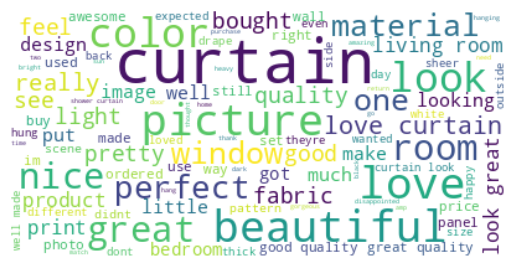

In [78]:
wordcloud = WordCloud(max_words = 100,
                      max_font_size = 50,
                      background_color = "white",
                      contour_width = 3).generate(text)

plt.imshow(wordcloud, interpolation = "bilinear")
#plt.figure(figsize = [10,10])
plt.axis("off")
plt.show()

## Sentiment Analysis

In [79]:
df["Review"][0:10]

0                                                happy
1       good quality material however panel mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck cant believe quality material ...
5                                 look different photo
6    exactly looking heavy material great price shi...
7    looking picture thought curtain would thinner ...
8    much whiter thought would wasnt really expecti...
9    curtain picture show 3rd set ambesonne curtain...
Name: Review, dtype: object

In [80]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df["Review"].apply(lambda x: sia.polarity_scores(x))[0:10]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [81]:
df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])[0:10]

0    0.5719
1    0.4404
2    0.7184
3    0.0000
4    0.9042
5    0.0000
6    0.6249
7    0.9080
8    0.0000
9    0.7096
Name: Review, dtype: float64

In [82]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"]

0       pos
1       pos
2       pos
3       neg
4       pos
       ... 
5606    pos
5607    neg
5608    pos
5609    pos
5610    pos
Name: sentiment_label, Length: 5611, dtype: object

In [83]:
df.head()

,Star,HelpFul,Title,Review,sentiment_label
0,5,0,looks great,happy,pos
1,5,0,Pattern did not align between the two panels.,good quality material however panel mismatched,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...,pos
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,neg
4,5,0,Wow great purchase,great bang buck cant believe quality material ...,pos


In [84]:
df.groupby("sentiment_label")["Star"].mean()

sentiment_label
neg    3.388889
pos    4.586779
Name: Star, dtype: float64

## Machine Learning

In [87]:
# Label encoder for target feature

df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
df["sentiment_label"]

0       1
1       1
2       1
3       0
4       1
       ..
5606    1
5607    0
5608    1
5609    1
5610    1
Name: sentiment_label, Length: 5611, dtype: int64

In [88]:
# Test-Train Split

train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["sentiment_label"],
                                                    random_state = 42)

In [89]:
# TF-IDF word level
from sklearn.feature_extraction.text import TfidfVectorizer

x_train_tf_idf_word = TfidfVectorizer()
x_test_tf_idf_word = TfidfVectorizer()

x_train_tf_idf_word = x_train_tf_idf_word.fit(train_x).transform(train_x)
x_test_tf_idf_word = x_test_tf_idf_word.fit(train_x).transform(test_x)

In [90]:
# TF-IDF N-Grams
tf_idf_ngrams = TfidfVectorizer(ngram_range = (3,3)).fit(train_x)
x_train_tf_idf_ngrams = tf_idf_ngrams.transform(train_x)
x_test_tf_idf_ngrams = tf_idf_ngrams.transform(test_x)

**Logistic Regression**

In [ ]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)
log_model2 = LogisticRegression().fit(x_train_tf_idf_ngrams, train_y)

In [ ]:
# Logistic Regression with TF-IDF Word level

y_pred = log_model.predict(x_test_tf_idf_word)
print(classification_report(y_pred, test_y))
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv = 10).mean()

              precision    recall  f1-score   support

         neg       0.34      0.90      0.49        83
         pos       0.99      0.89      0.94      1320

    accuracy                           0.89      1403
   macro avg       0.66      0.90      0.71      1403
weighted avg       0.95      0.89      0.91      1403



0.8546099290780141

In [ ]:
# Logistic Regression with TF-IDF N-Grams level

y_pred2 = log_model2.predict(x_test_tf_idf_ngrams)
print(classification_report(y_pred2, test_y))
cross_val_score(log_model2, x_test_tf_idf_ngrams, test_y, cv = 10).mean()

              precision    recall  f1-score   support

         neg       0.01      1.00      0.03         3
         pos       1.00      0.84      0.91      1400

    accuracy                           0.84      1403
   macro avg       0.51      0.92      0.47      1403
weighted avg       1.00      0.84      0.91      1403



0.8417781155015197

In [ ]:
random_reviews = pd.Series(df["Review"].sample(3).values)
random_reviews

0    ordered living room curtain arrived promptly m...
1    skeptical loved definitely worth money opinion...
2                                   came 1 two curtain
dtype: object

In [ ]:
reviews = CountVectorizer().fit(train_x).transform(random_reviews)
log_model.predict(reviews)

array(['pos', 'pos', 'pos'], dtype=object)

**Random Forests**

In [ ]:
# Random Forest TF-IDF Word level

rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
y_pred = rf_model.predict(x_test_tf_idf_word)
print(classification_report(y_pred, test_y))
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv = 10, n_jobs = -1).mean()

              precision    recall  f1-score   support

         neg       0.57      0.80      0.66       159
         pos       0.97      0.92      0.95      1244

    accuracy                           0.91      1403
   macro avg       0.77      0.86      0.81      1403
weighted avg       0.93      0.91      0.92      1403



0.8952279635258359

In [ ]:
# Random Forest TF-IDF N-Grams level

rf_model2 = RandomForestClassifier().fit(x_train_tf_idf_ngrams, train_y)
y_pred = rf_model2.predict(x_test_tf_idf_ngrams)
print(classification_report(y_pred, test_y))
cross_val_score(rf_model2, x_train_tf_idf_ngrams, train_y, n_jobs = -1, cv = 10).mean()

              precision    recall  f1-score   support

         neg       0.04      0.67      0.07        12
         pos       1.00      0.85      0.91      1391

    accuracy                           0.84      1403
   macro avg       0.52      0.76      0.49      1403
weighted avg       0.99      0.84      0.91      1403



0.8545633978056781

In [98]:
# LightGBM TF-IDF Word level
!pip install lightgbm

lgbm = lgbm.LGBMClassifier().fit(x_train_tf_idf_word, train_y)
y_pred = lgbm.predict(x_test_tf_idf_word)
print(classification_report(y_pred, test_y))
cross_val_score(lgbm, x_test_tf_idf_word, test_y, n_jobs = -1, cv = 10).mean()

[LightGBM] [Info] Number of positive: 3585, number of negative: 623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11624
[LightGBM] [Info] Number of data points in the train set: 4208, number of used features: 425
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.851949 -> initscore=1.749967
[LightGBM] [Info] Start training from score 1.749967
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       212
           1       0.97      0.96      0.96      1191

    accuracy                           0.94      1403
   macro avg       0.87      0.89      0.88      1403
weighted avg       0.94      0.94      0.94      1403



0.8745390070921987

In [100]:
!pip install lightgbm

In [103]:
# LightGBM TF-IDF N-Grams level

lgbm.fit(x_train_tf_idf_ngrams, train_y)
y_pred = lgbm.predict(x_test_tf_idf_ngrams)
print(classification_report(y_pred, test_y))
cross_val_score(lgbm, x_test_tf_idf_ngrams, test_y, n_jobs = -1, cv = 10).mean()

[LightGBM] [Info] Number of positive: 3585, number of negative: 623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 4208, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.851949 -> initscore=1.749967
[LightGBM] [Info] Start training from score 1.749967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

0.841063829787234

In [106]:
# CART model TF-IDF Word level

cart_model = DecisionTreeClassifier().fit(x_train_tf_idf_word, train_y)
y_pred = cart_model.predict(x_test_tf_idf_word)
print(classification_report(y_pred, test_y))
cross_val_score(cart_model, x_test_tf_idf_word, test_y, n_jobs = -1, cv = 10).mean()

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       218
           1       0.96      0.95      0.95      1185

    accuracy                           0.92      1403
   macro avg       0.85      0.85      0.85      1403
weighted avg       0.92      0.92      0.92      1403



0.9030648429584598

In [107]:
# CART model TF-IDF N-Grams level

cart_model = DecisionTreeClassifier().fit(x_train_tf_idf_ngrams, train_y)
y_pred = cart_model.predict(x_test_tf_idf_ngrams)
print(classification_report(y_pred, test_y))
cross_val_score(cart_model, x_test_tf_idf_ngrams, test_y, n_jobs = -1, cv = 10).mean()

              precision    recall  f1-score   support

           0       0.04      0.39      0.07        23
           1       0.99      0.84      0.91      1380

    accuracy                           0.84      1403
   macro avg       0.51      0.62      0.49      1403
weighted avg       0.97      0.84      0.90      1403



0.8432016210739615

## Conclusion

- The best result CART model with TF-IDF Word Vectorizer